# Isotonic Regression

The isotonic regression finds a non-decreasing approximation of a function while minimizing the mean squared error on the training data. The benefit of such a model is that it does not assume any form for the target function such as linearity.

Isotonic regression is used iteratively to fit ideal distances to preserve relative dissimilarity order. Isotonic regression is also used in probabilistic classification to calibrate the predicted probabilities of supervised machine learning models.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state
import pandas as pd
from sklearn.datasets import make_regression

Generating dataset

In [36]:
n = 100
# X = np.arange(n)
# rs = check_random_state(0)
# y = rs.randint(-50, 50, size=(n,)) + 50. * np.log1p(np.arange(n))

X, y = make_regression(n_samples=n, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)


Fit IsotonicRegression and LinearRegression models

In [39]:
ir = IsotonicRegression()

y_ = ir.fit_transform(X, y)

lr = LinearRegression()
lr.fit(X, y)  # x needs to be 2d for LinearRegression


LinearRegression()

Plot Result

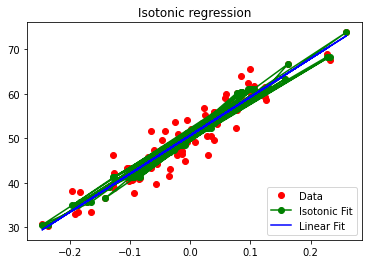

In [41]:
segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

fig = plt.figure()
plt.plot(X, y, 'r.', markersize=12)
plt.plot(X, y_, 'g.-', markersize=12)
plt.plot(X, lr.predict(X), 'b-')
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Isotonic regression')
plt.show()
